# 3.2.2 - Naive Bayes


* En este Notebook vamos a ver el clasificador ***Naive Bayes***, y vamos a ***resolver un problema de clasificación usando*** la implementación de este Algoritmo de Aprendizaje con la ***librería de scikit-learn***.


* Vamos a tratar los siguientes puntos:
<span></span><br>
    1. [Teorema de Bayes](#M1)
<span></span><br>
    2. [Naive de Bayes](#M2)
<span></span><br>
    3. [Gaussian Naive de Bayes](#M3)
<span></span><br>
    4. [Ejemplo de Clasificación de Pacientes con Diabetes](#M4)
    <span></span><br>
    4.1. [Carga de datos](#M41)
    <span></span><br>
        4.2. [Cambio de estructura de datos a numpy y Particionado de datos en Entrenamiento y Test](#M42)
    <span></span><br>
        4.3. [Visualización de los datos](#M43)
    <span></span><br>
        4.4. [Creacción y ajuste de los modelos](#M44)
    <span></span><br>
        4.5. [Evaluación de los modelos](#M45)
    <span></span><br>
        4.6. [Conclusiones](#M45)


<hr>


## <a name="M1">1. Teorema de Bayes</a>

* Uno de los clasificadores más sencillos de entender es el clasificador ***Naive Bayes***, que es un clasificador probabilístico que se basa en el ***Teorema de Bayes***.


* El ***Teorema de Bayes*** define lo siguiente:


<span style="font-size:20px">$$P(y|x) = \frac{P(x|y) \cdot P(y)}{P(x)}$$</span>


* Con el ***Teorema de bayes podemos calcular la probabilidad $P(y|x)$***, que es la probabilidad de que un elemento 'x' pertenezca a una clase 'y', ***teniendo unicamente como datos***:
<span></span><br><br>
    + ***$P(x)$ - Probabilidad Marginal***: Probabilidad de los elementos 'x'.
<span></span><br><br>
    + ***$P(y)$ - Probabilidad a priori***: Probabilidad de las clases 'y'.
<span></span><br><br>
    + ***$P(x|y)$ - Probabilidad condicionada***: Probabilidad de los casos de cada clase.


* Resumiendo, tenemos lo siguiente:


<img src="../../imgs/3_02_02_01_bayes.png" style="width: 400px;"/>


#### Ejemplo

* Vamos a ver a continuación un sencillo ejemplo de como aplicar el Teorema de Bayes, en el que vamos a clasificar cual es la probabilidad de que una persona se quede en casa (en el sofa) o salga a pasear (Paseo), sabiendo si llueve o no llueve (si hace sol), a partir de las siguientes observaciones:

|x|y|
|---|---|
|Sol|Paseo|
|Lluvia|Paseo|
|Sol|Paseo|
|Sol|Paseo|
|Sol|Paseo|
|Lluvia|Sofa|
|Lluvia|Sofa|
|Sol|Sofa|
|Sol|Sofa|
|Lluvia|Sofa|


* Con este conjunto de datos, podemos observa que tenemos dos clases {y=Paseo, y=Sofa} para clasificar en función de 1 variable 'x' que toma como posibles valores {Sol,Lluvia}.


* Por tanto tenemos que calcular las siguientes probabilidades 

$$P(y=Paseo|x) = \frac{P(x|Paseo) \cdot P(Paseo)}{P(x)}$$

$$P(y=Sofa|x) = \frac{P(x|Sofa) \cdot P(Sofa)}{P(x)}$$


* En primer lugar vamos a calcular la ***probabilidad a priori*** $P(y)$; es decir, la probabilidad de salir de paseo o de quedarse en el sofa, y esto se calcula como:

$$P(y=Paseo) = \frac{Observaciones\:de\:y=Paseo}{Total\:de\:observaciones} = \frac{5}{10} = 0.5$$

$$P(y=Sofa) = \frac{Observaciones\:de\:y=Sofa}{Total\:de\:observaciones} = \frac{5}{10} = 0.5$$


* En segundo lugar vamos a calcular la ***probabilidad marginal*** $P(x)$; es decir, la probabilidad de sol o la probabilidad de lluvia:

$$P(x=Sol) = \frac{Observaciones\:de\:x=Sol}{Total\:de\:observaciones} = \frac{6}{10} = 0.6$$

$$P(x=Lluvia) = \frac{Observaciones\:de\:x=Lluvia}{Total\:de\:observaciones} = \frac{4}{10} = 0.4$$


* Por último vamos a calcular la ***probabilidad condicionada*** $P(x|y)$:

$$P(x=Sol | y=Paseo) = \frac{Observaciones\:de\:y=Paseo\:y\:x=SOL}{Total\:de\:y=Paseo} = \frac{4}{5} = 0.8$$

$$P(x=Lluvia | y=Paseo) = \frac{Observaciones\:de\:y=Paseo\:y\:x=Lluvia}{Total\:de\:y=Paseo} = \frac{1}{5} = 0.2$$

$$P(x=Sol | y=Sofa) = \frac{Observaciones\:de\:y=Sofa\:y\:x=SOL}{Total\:de\:y=Sofa} = \frac{2}{5} = 0.4$$

$$P(x=Lluvia | y=Sofa) = \frac{Observaciones\:de\:y=Sofa\:y\:x=Lluvia}{Total\:de\:y=Sofa} = \frac{3}{5} = 0.6$$


* Con todo esto ya podemos calcular la ***probabilidad a posteriori*** $P(y|x)$ que es la probabilidad de salir de paseo o quedarse en casa en función del tiempo que hace. Vamos a continuación a calcular las 4 posibles probabilidades:

$$P(y=Paseo | x=Sol) = \frac{P(x=Sol | y=Paseo) \cdot P(y=Paseo)}{P(x=Sol)} = \frac{0.8 \cdot 0.5}{0.6} = 0.67$$

$$P(y=Paseo | x=Lluvia) = \frac{P(x=Lluvia | y=Paseo) \cdot P(y=Paseo)}{P(x=Lluvia)} = \frac{0.2 \cdot 0.5}{0.4} = 0.25$$

$$P(y=Sofa | x=Sol) = \frac{P(x=Sol | y=Sofa) \cdot P(y=Sofa)}{P(x=Sol)} = \frac{0.4 \cdot 0.5}{0.6} = 0.33$$

$$P(y=Sofa | x=Lluvia) = \frac{P(x=Lluvia | y=Sofa) \cdot P(y=Sofa)}{P(x=Lluvia)} = \frac{0.6 \cdot 0.5}{0.4} = 0.75$$


* En resumen tenemos lo siguiente:

|x|y|P(x/y)|P(y)|P(x)|P(y/x)|
|---|---|---|---|---|---|
|Sol|Paseo|0.8|0.5|0.6|0.67|
|Lluvia|Paseo|0.2|0.5|0.4|0.25|
|Sol|Sofa|0.4|0.5|0.6|0.33|
|Lluvia|Sofa|0.6|0.5|0.4|0.75|


<hr>


## <a name="M2">2. Naive Bayes</a>


* Una simplificación del Teorema de Bayes es ***asumir que las variables mediante las que se describen nuestros elementos son independientes***.


* Si añadimos esta suposición a nuestro clasificador tenemos lo que se conoce como ***Naive Bayes*** (el Bayes Ingenuo), por lo que ***podemos calcular la probabilidad a posteriori*** (o la probabilidad de que un elemento pertenezca a una clase) como:


<span style="font-size:20px">$$P(y=y_j|x) = P(x|y=y_j) \cdot P(y_j)$$</span>


* Aunque en el ejemplo anterior nuestro conjunto de datos solo tenia una variable, cada elemento de nuestro Dataset podrá tener 'n' variables, las cuales asumimos que son independientes; por tanto, calculamos la ***probabilidad condicionada*** como:


$$P(x|y=y_j) = P(x_1|y=y_j) \: \times \: ... \: \times \: P(x_n|y=y_j) = \prod_{i=1}^{n} P(x_i|y=y_j)$$


* Por tanto ***calculamos la probabilidad a posteriori*** definida por el clasificador ***Naive Bayes*** como:

<span style="font-size:20px">$$P(y=y_j|x) = P(y=y_j) \cdot \prod_{i=1}^{n} P(x_i|y=y_j)$$</span>


<hr>


## <a name="M3">3. Gaussian Naive Bayes</a>


* El ***Clasificador de Naive Bayes*** pueda ***aplicarse*** no solo a elementos que contengan variables discretas, si no que también podemos ***aplicarlo a elementos que tengan variables numéricas***.


* Para poder aplicar el ***Clasificador de Naive Bayes*** a elementos con variables numericas, ***debemos de asumir que estas variables siguen algún tipo de distribución como pueda ser por ejemplo una distribución normal*** (o distribución Gaussiana), de ahí el nombre de ***Gaussian Naive Bayes***.


* También podemos asumir que los datos siguen algun otro tipo de distribución como por ejemplo una ditribución multinomial o de Bernoulli, dando lugar a los clasificadores ***Multinomial Naive Bayes*** y ***Bernoulli Naive Bayes*** respectivamente.


* Para el caso del ***Gaussian Naive Bayes*** podemos calcular la probabilidad de que una variable $x_i$ del elemento pertenezca a una clase a partir de la función de densidad de una distribución normal; que para aplicarla, solo tenemos que saber la media ($\mu$) y la desviación ($\sigma$) de la variable en cuestión: 

$$P(x=x_i, \mu, \sigma|x \in y_j) = \frac{1}{\sqrt{2\pi\sigma^2}} \cdot e^{-\frac{1}{2}(\frac{x_i-\mu}{\sigma})^2}$$


## <a name="M4">4. Ejemplo de Clasificación de Pacientes con Diabetes</a>

* En el siguiente ejemplo vamos a Clasificar a las personas en Diabéticas y no Diabéticas en función de una serie de variables usando los siguientes clasificadores implementados en la librería de Scikit-Learn:
<span></span><br><br>
    + ***Gaussian Naive Bayes:***<br> https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
    + ***Multinomial Naive Bayes:***<br> https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
    + ***Bernoulli Naive Bayes:***<br>https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html


* Para realizar esta clasificación vamos a tener las siguientes variables de los pacientes:

    - ***Pregnancies***: Number of times pregnant
    - ***GlucosePlasma***: glucose concentration
    - ***BloodPressure***: Diastolic blood pressure
    - ***SkinThickness***: Triceps skin fold thickness
    - ***Insulin***: 2-Hour serum insulin
    - ***BMI***: Body mass index 
    - ***DiabetesPedigreeFunction***: Diabetes pedigree function
    - ***Age***: Age
    - ***OutcomeClass***: variable (0 or 1) 268 of 768 are 1, the others are 0


* Para resolver este problema vamos a realizar los siguientes pasos:
<span></span><br>
    4.1. [Carga de datos](#M41)
<span></span><br>
    4.2. [Cambio de estructura de datos a numpy y Particionado de datos en Entrenamiento y Test](#M42)
<span></span><br>
    4.3. [Visualización de los datos](#M43)
<span></span><br>
    4.4. [Creacción y ajuste de los modelos](#M44)
<span></span><br>
    4.5. [Evaluación de los modelos](#M45)
<span></span><br>
    4.6. [Conclusiones](#M46)


* En primer lugar vamos a importar las librería necesarias:

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
%matplotlib inline 

<hr>


### <a name="M41">4.1. Carga de datos</a>

* El primer paso que vamos a realizar es el de cargar los datos que los tenemos en el siguiente fichero:
    - ***DataSet***: "../../data/diabetes.csv"


In [2]:
df = pd.read_csv("../../data/diabetes.csv")
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
226,0,101,76,0,0,35.7,0.198,26,0
119,4,99,76,15,51,23.2,0.223,21,0
366,6,124,72,0,0,27.6,0.368,29,1
606,1,181,78,42,293,40.0,1.258,22,1
418,1,83,68,0,0,18.2,0.624,27,0


<hr>


### <a name="M42">4.2. Cambio de estructura de datos a numpy y Particionado de datos en Entrenamiento y Test</a>


In [3]:
# Paso a Numpy
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
        'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].values
y = df['Outcome'].values 

# División de datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<hr>


### <a name="M43">4.3. Visualización de los datos</a>


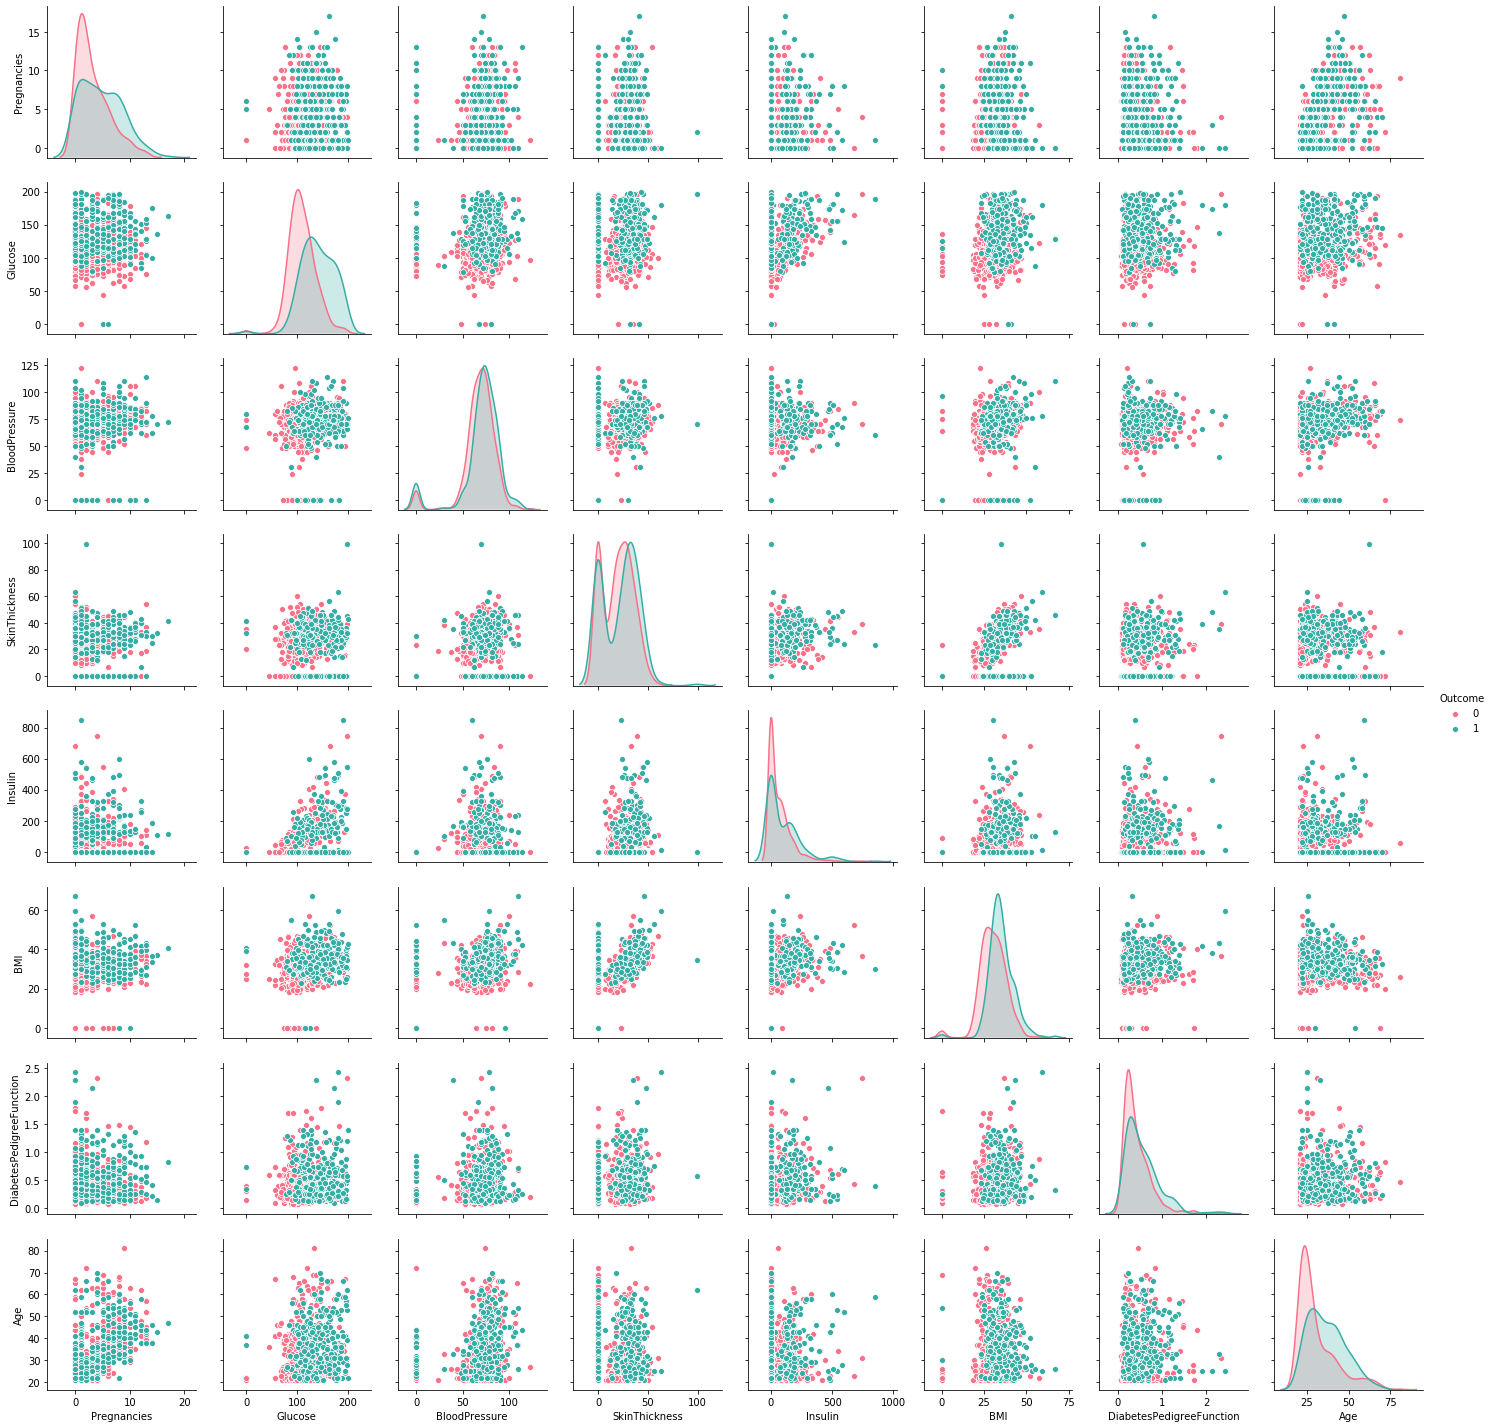

In [4]:
sns.pairplot(df, hue="Outcome", palette="husl", vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
        'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

<hr>


### <a name="M44">4.4. Creacción y ajuste de los modelos</a>


In [5]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

clasificadores = {'Gaussian Naive Bayes': gnb,
                  'Multinomial Naive Bayes': mnb,
                  'Bernoulli Naive Bayes': bnb}


# Ajustamos los modelos
for k, v in clasificadores.items():
    print ('CREANDO MODELO: {clas}'.format(clas=k))
    v.fit(X_train, y_train)

CREANDO MODELO: Gaussian Naive Bayes
CREANDO MODELO: Multinomial Naive Bayes
CREANDO MODELO: Bernoulli Naive Bayes


<hr>


### <a name="M45">4.5. Evaluación de los modelos y Conclusiones</a>

* Para cada uno de los modelos vamos a calcular las siguientes métricas de evaluación:

    + Accuracy
    + F1
    + Precision
    + Recall
    + AUC_ROC


In [6]:
evaluacion = list()
for k, v in clasificadores.items():
    print ('EVALUANDO MODELO: {model}'.format(model=k))
    model = {}
    model['name'] = k
    y_pred_train = v.predict(X_train)
    y_pred_test = v.predict(X_test)
    y_prob_train = v.predict_proba(X_train)
    y_prob_test = v.predict_proba(X_test)
    model['accuracy_train'] = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    model['accuracy_tests'] = accuracy_score(y_true=y_test, y_pred=y_pred_test)
    model['precision_train'] = precision_score(y_true=y_train, y_pred=y_pred_train)
    model['precision_tests'] = precision_score(y_true=y_test, y_pred=y_pred_test)
    model['recall_train'] = recall_score(y_true=y_train, y_pred=y_pred_train)
    model['recall_tests'] = recall_score(y_true=y_test, y_pred=y_pred_test)
    model['f1_train'] = f1_score(y_true=y_train, y_pred=y_pred_train)
    model['f1_tests'] = f1_score(y_true=y_test, y_pred=y_pred_test)
    model['auc_roc_train'] = roc_auc_score(y_true=y_train, y_score=y_prob_train[:, 1])
    model['auc_roc_tests'] = roc_auc_score(y_true=y_test, y_score=y_prob_test[:, 1])
    evaluacion.append(model)

# Pasamos los resultados a un DataFrame para visualizarlos mejor
df = pd.DataFrame.from_dict(evaluacion)
df.set_index("name", inplace=True)
df.head()

EVALUANDO MODELO: Gaussian Naive Bayes
EVALUANDO MODELO: Multinomial Naive Bayes
EVALUANDO MODELO: Bernoulli Naive Bayes


,accuracy_train,accuracy_tests,precision_train,precision_tests,recall_train,recall_tests,f1_train,f1_tests,auc_roc_train,auc_roc_tests
name,,,,,,,,,,
Gaussian Naive Bayes,0.757329,0.792208,0.680000,0.674419,0.615385,0.617021,0.646081,0.644444,0.822010,0.841320
Multinomial Naive Bayes,0.591205,0.636364,0.438017,0.415094,0.479638,0.468085,0.457883,0.440000,0.550119,0.587890
Bernoulli Naive Bayes,0.644951,0.694805,0.636364,0.500000,0.031674,0.021277,0.060345,0.040816,0.540200,0.521674


* A continuación vamos a mostrar las matrices de confusión para entrenamiento y test de cada uno de los clasificadores:

Obteniendo Matriz de Confusión de: Gaussian Naive Bayes
Obteniendo Matriz de Confusión de: Multinomial Naive Bayes
Obteniendo Matriz de Confusión de: Bernoulli Naive Bayes


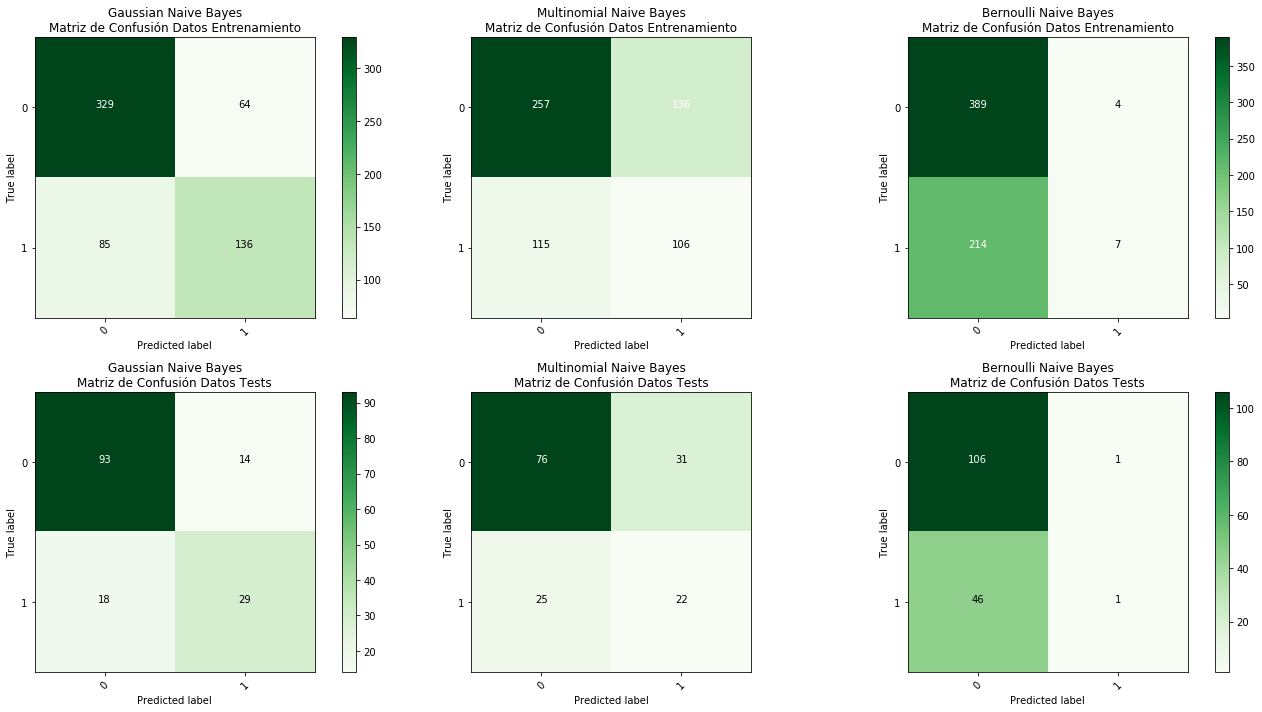

In [7]:
# Obtenemos las Matrices de confusión
msc = list()
for k, v in clasificadores.items():
    print ('Obteniendo Matriz de Confusión de: {model}'.format(model=k))
    model = {}
    model['name'] = k
    y_pred_train = v.predict(X_train)
    y_pred_test = v.predict(X_test)
    model['confusion_matrix_train'] = confusion_matrix(y_true=y_train, y_pred=y_pred_train)
    model['confusion_matrix_test'] = confusion_matrix(y_true=y_test, y_pred=y_pred_test)
    msc.append(model)

# Definimos el heatmap de la matriz de confusión
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Pintamos las matrices de confusión
plt.figure(figsize=(20, 10))
for i, mc in enumerate(msc):
    plt.subplot(2, 3, i+1)
    plot_confusion_matrix(mc['confusion_matrix_train'], classes=['0', '1'], 
                          title='{}\nMatriz de Confusión Datos Entrenamiento'.format(mc['name']))
    plt.subplot(2, 3, i+4)
    plot_confusion_matrix(mc['confusion_matrix_test'], classes=['0', '1'], 
                          title='{}\nMatriz de Confusión Datos Tests'.format(mc['name'] ))
plt.show()

<hr>


### <a name="M46">4.6. Conclusiones</a>


* Con los resultados obtenidos de las medidas de evaluación de los modelos, podemos observar como los 3 modelos cometen errores similares con los datos de entrenamiento y test, incluso podemos ver como con los datos de test cometemos menos errores. Sobre el tema de los errores podemos concluir que generamos modelos que generalizan bastante bien.


* Haciendo una comparativa de los resultados de los tres modelos, es evidente concluir que con el ***Clasificador Naive Bayes obtenemos mejores resultados de clasificación*** que con los otros dos. Esto es debido a que las variables de nuestro Dataset siguen distribuciones normales y por tanto este tipo de datos se ajusta muy bien a este clasificador, por lo tanto deberíamos de escoger este clasificador para realizar predicciones futuras.

<hr>


Este Notebook ha sido desarrollado por **Ricardo Moya García** y registrado en Safe Creative como ***Atribución-NoComercial-CompartirIgual***.


<img src="../../imgs/CC_BY-NC-SA.png" alt="CC BY-NC">